In [ ]:
#degrees - 0' ~ 360' / radian 0 ~ 2파이
#sin 입력에는 degree 가 아닌 radian 이 들어가야함
#소리라는 개념은 반드시 그 안에 시간의 개념이 있어야함

# Phasor

In [ ]:
#sampling rate = 몇개의 숫자로 할지(음질의 해상도) 단위는 frequency 와 같이 hz

In [12]:
#parameter setting
amp = 1 #range (0.0 , 1.0)
sr = 10000 #sampling rate, Hz
dur = 0.5 #in seconds
freq = 100.0 #sine frequency, Hz

In [13]:
#먼저 generate time
# t 0.0001 0.0002 0.0003 ... 0.5000 이게 우리가 만드려는 time 이렇게 하면 1초에 time몇개 들어갈까? (이게 sampling rate 임)
#위에서 sampling rate는 10000, 0.5000 이 duration 
import numpy as np
t= np.arange(1, sr * dur+1)/sr #젤마지막꺼 포함하려고 +1한것. 이게 위에 있는 거랑 똑같은 것

In [14]:
t #time없으면 실체의 소리 존재할 수 없음

array([1.000e-04, 2.000e-04, 3.000e-04, ..., 4.998e-01, 4.999e-01,
       5.000e-01])

In [15]:
#generate phase
theta = t * 2*np.pi * freq #1초에서의 time값은 1근데 2pi 곱하니까 1은 곧 2pi가 됨. pi를 이용해 loop만들려는 것
#우리의 frequency는 2pi가 1초 동안 몇바퀴가 있어야 하는가를 의미하는 것. 아까 freq=100했으니까 2pi는 1초동안 100바퀴 돌아야 함

In [16]:
#generate signal bt cosine-phasor
s = np.sin(theta)
#time의 백터의 사이즈와 theta의 백터의 사이즈는 같다? 당연! 아까 time이라고 1/10000 부터 5000/10000까지 만들었는데 theta도 같음

Text(0, 0.5, 'real')

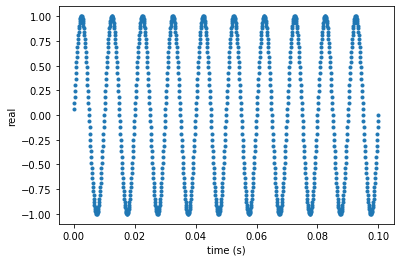

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.') #t는 time s는 sine; x축은 time y축은 sine 둘다 1000개만(5000개 다한거 아님)
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

In [18]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

In [49]:
#parameter setting
amp = 2 #range (0.0 , 1.0)
sr = 10000 #sampling rate, Hz
dur = 0.5 #in seconds
freq = 100.0 #sine frequency, Hz

In [20]:
theta = np.arange(0, 2*np.pi, 0.1) #np안에 pi가 들어있는 거라 꼭 np.pi라고 써야함 #0.1하는 게 빽빽한 그래프 만드는 비법
theta

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2])

In [21]:
type(theta[1])

numpy.float64

In [22]:
s =np.sin(theta)
s

array([ 0.        ,  0.09983342,  0.19866933,  0.29552021,  0.38941834,
        0.47942554,  0.56464247,  0.64421769,  0.71735609,  0.78332691,
        0.84147098,  0.89120736,  0.93203909,  0.96355819,  0.98544973,
        0.99749499,  0.9995736 ,  0.99166481,  0.97384763,  0.94630009,
        0.90929743,  0.86320937,  0.8084964 ,  0.74570521,  0.67546318,
        0.59847214,  0.51550137,  0.42737988,  0.33498815,  0.23924933,
        0.14112001,  0.04158066, -0.05837414, -0.15774569, -0.2555411 ,
       -0.35078323, -0.44252044, -0.52983614, -0.61185789, -0.68776616,
       -0.7568025 , -0.81827711, -0.87157577, -0.91616594, -0.95160207,
       -0.97753012, -0.993691  , -0.99992326, -0.99616461, -0.98245261,
       -0.95892427, -0.92581468, -0.88345466, -0.83226744, -0.77276449,
       -0.70554033, -0.63126664, -0.55068554, -0.46460218, -0.37387666,
       -0.2794155 , -0.1821625 , -0.0830894 ])

<IPython.core.display.Javascript object>


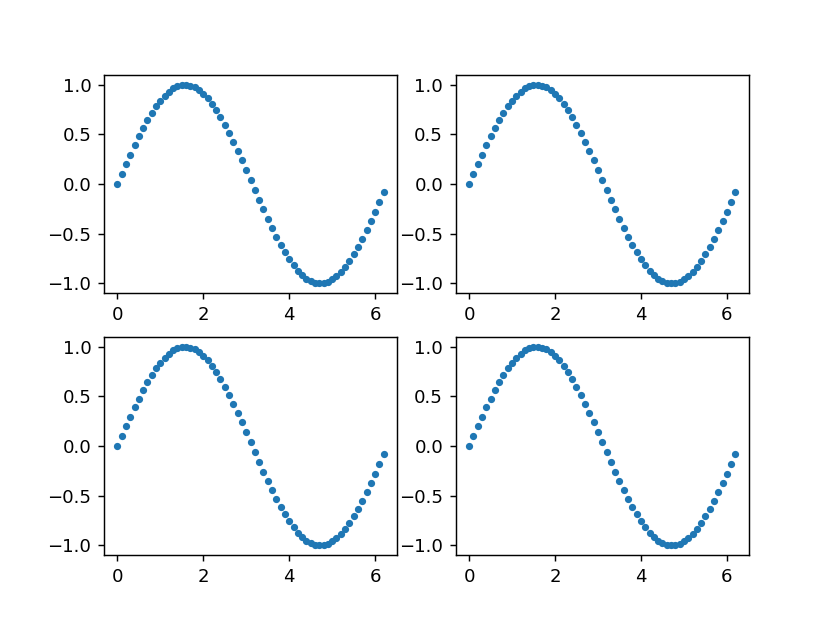

In [23]:
fig = plt.figure()
ax = fig.add_subplot(221)
ax.plot(theta, s, '.')
ax = fig.add_subplot(222)
ax.plot(theta, s, '.')
ax = fig.add_subplot(223)
ax.plot(theta, s, '.')
ax = fig.add_subplot(224)
ax.plot(theta, s, '.')

<IPython.core.display.Javascript object>


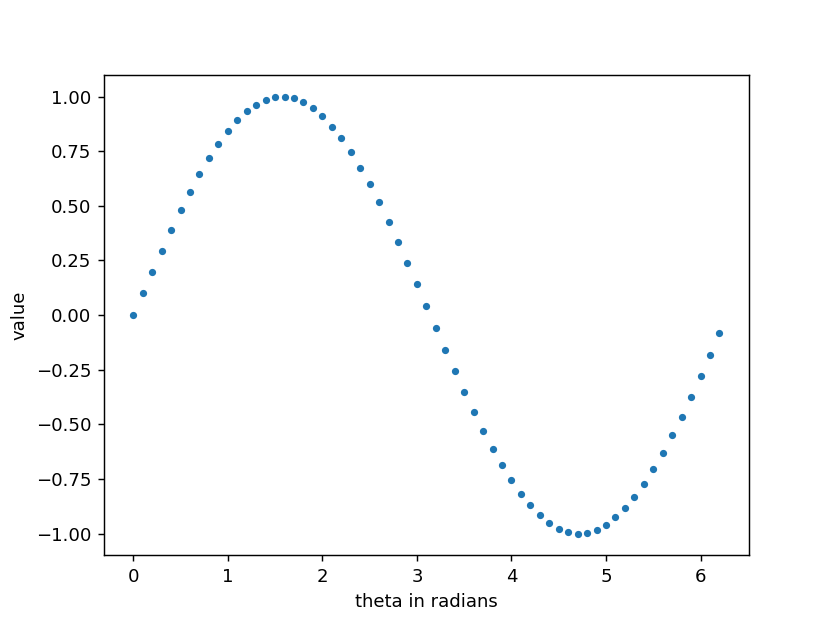

Text(0, 0.5, 'value')

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111)
 #x축이 뭔지 y축이 뭔지 이름을 달아주자! #'-'대신 '.'하면 선 그래프가 아닌 점그래프가 나옴
ax.plot(theta, s, '.')
ax.set_xlabel('theta in radians')
ax.set_ylabel('value')
#x축 상에서는 equidistance 맞는데 y축 상에서는 아님. y축에서 equidistance는 직선그래프(linial)만 해당(y=ax+b)

In [24]:
theta = np.arange(0, 2*np.pi*5 , 0.1) #2pi에 해당하는 게 다섯번 돈다는 뜻
theta

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [25]:
s =np.sin(theta)
s

array([ 0.        ,  0.09983342,  0.19866933,  0.29552021,  0.38941834,
        0.47942554,  0.56464247,  0.64421769,  0.71735609,  0.78332691,
        0.84147098,  0.89120736,  0.93203909,  0.96355819,  0.98544973,
        0.99749499,  0.9995736 ,  0.99166481,  0.97384763,  0.94630009,
        0.90929743,  0.86320937,  0.8084964 ,  0.74570521,  0.67546318,
        0.59847214,  0.51550137,  0.42737988,  0.33498815,  0.23924933,
        0.14112001,  0.04158066, -0.05837414, -0.15774569, -0.2555411 ,
       -0.35078323, -0.44252044, -0.52983614, -0.61185789, -0.68776616,
       -0.7568025 , -0.81827711, -0.87157577, -0.91616594, -0.95160207,
       -0.97753012, -0.993691  , -0.99992326, -0.99616461, -0.98245261,
       -0.95892427, -0.92581468, -0.88345466, -0.83226744, -0.77276449,
       -0.70554033, -0.63126664, -0.55068554, -0.46460218, -0.37387666,
       -0.2794155 , -0.1821625 , -0.0830894 ,  0.0168139 ,  0.1165492 ,
        0.21511999,  0.31154136,  0.40484992,  0.49411335,  0.57

<IPython.core.display.Javascript object>


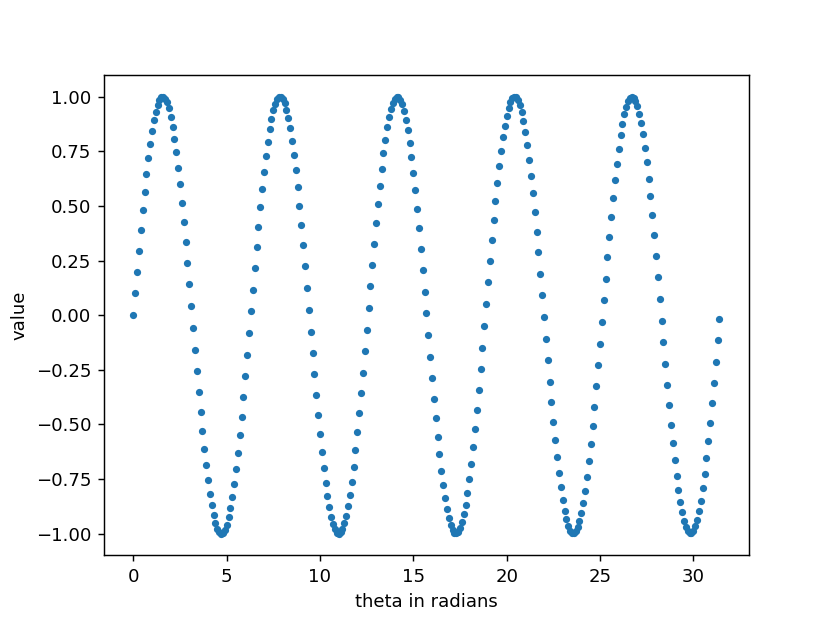

Text(0, 0.5, 'value')

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(theta, s, '.')
ax.set_xlabel('theta in radians')
ax.set_ylabel('value')

In [28]:
t= np.arange (1,sr*dur+1)/sr #duration만큼의 sampling rate만큼의 time tic을 만드는 것 이자체가 시간은 아님


In [29]:
#generate phase
theta = t * 2*np.pi * freq  #time은 1초라 생각했을 때 1에다가 2파이 곱한 것 
#(1초동안 한바퀴 도는 것을 만들어라 (더많은 바퀴 만들고 싶음 *숫자 하면 됨))
#time을 연동시키는 방법

In [50]:
#generate signal by cosine-phasor
s= amp*np.sin(theta) #amplitude를 곱해준 것

<IPython.core.display.Javascript object>


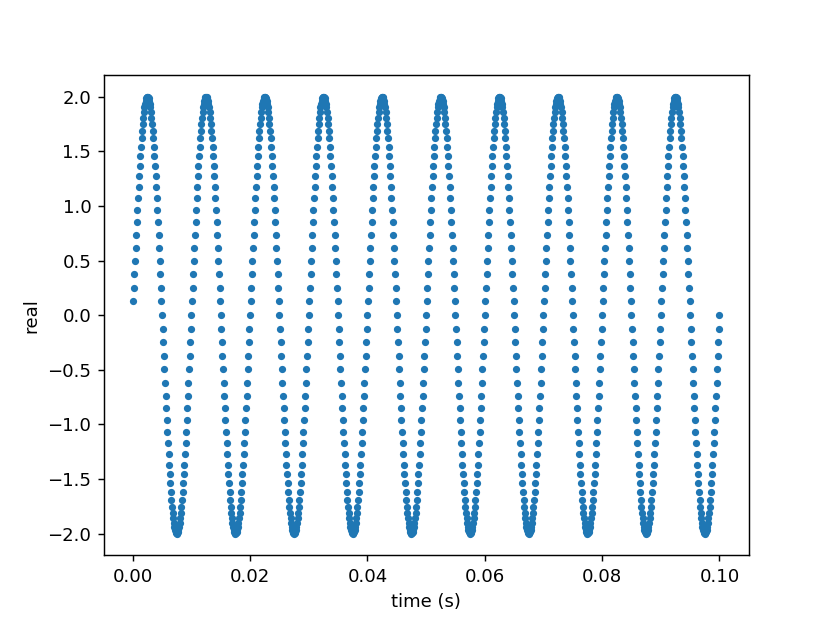

Text(0, 0.5, 'real')

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.') #얘는 2차원. t,s두개뿐이니
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
#밑에 그래프에서 한ㅂㅏ퀴가 2pi 두바퀴가 4pi 이렇게 변화 ㄴ데 그게 몇초동안 변화하는 건지가 우리의 관심사 (실제 소리에서는)
#밑에 그래프에서 점의 개수는? 1000개 예를 들어 s[1:1000]이면 실행 안됨 왜냐면 t개수랑 맞지 않아서
# t[0:100], s[0:100] 이렇게 하면 점이 100개니까 더 널널 한 그래프가 됨

In [52]:
#generate signal by complex-phasor
c = amp*np.exp(theta*1j) #이거도 theta에 의해서 값이 바뀜. 나머지는 고정된 숫자
c #요고 값들 다 복소수임. 실수 넘어갔구나.

array([1.99605346+1.25581039e-01j, 1.9842294 +2.50666467e-01j,
       1.9645745 +3.74762629e-01j, ..., 1.9842294 -2.50666467e-01j,
       1.99605346-1.25581039e-01j, 2.        +3.92877345e-15j])

<IPython.core.display.Javascript object>


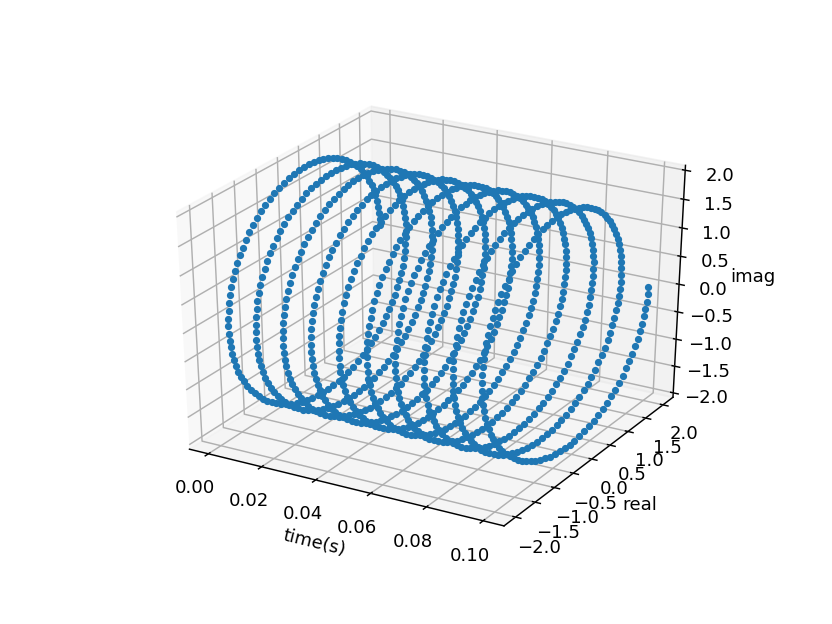

Text(0.5, 0, 'imag')

In [53]:
fig = plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.') #세개의 값 3차원 백터가 됨을 의미 총 몇개의 점? 1000개
#[c.real은 0.99802673만 받아오고  c.imag는 뒷부분인 +6.27905195e-02j 를 받아옴
ax.set_xlabel('time(s)')
ax.set_ylabel('real')
ax.set_zlabel('imag') #imag만보면 완전한 sine wave나옴

In [35]:
ipd.Audio(c.real, rate=sr) 

In [48]:
#!pip install sounddevice
import sounddevice as sd
sd.play(c.real,sr)

In [ ]:
#sampling rate이 100개라고 생각하면 우리가 표현할 수 있는 숫자개수가 1초에 100개
#100개의 수를 가지고 1Hz frequency 를 표현 할수 있을까? ㅇㅇ 한번의 sine wave주기가 있으면 됨
#2hz주기도 가능. (두번 왔다갔다 하면됨) 10000hz는 가능할까????? 안됨. 우리가 가진 숫자가 넘 적음
#sampling rate이 1초에 충분히 있어야 그만큼의 주파수를 표현 가능
#우리가 표현할 수 있는 주파수는 주어진 숫자의 개수의 반밖에 안됨 (반이하는 더 쉬움, 반 이상이 어려움)
#nyguist frequency -sampling rate의 반(무조건) ex) 44100hz 면 22050hz까지 표현 가능 
#사람이 들을 수 있는 젤 높은 frequency 가 20000. 

<IPython.core.display.Javascript object>


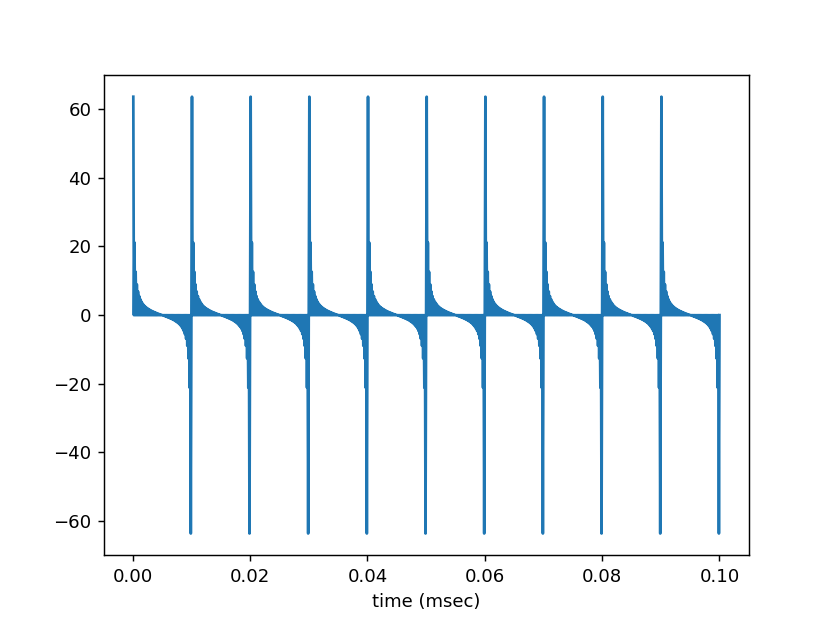

In [55]:
# generate samples, note conversion to float32 array #sampling rate의 반만큼만 갈 수있음 유의!
F0 = 100; Fend = int(sr/2); s = np.zeros(len(t));
for freq in range(F0, Fend+1, F0):
    theta = t * 2*np.pi * freq
    tmp = amp * np.sin(theta)
    s = s + tmp
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr)
#왜 pulse train? sinewave의 부드러운 부분 다 점점점점 없어지고

In [ ]:
#formant 에 따라 모음이 '아''이' 바뀜

In [1]:
amp = 1 #range (0.0 , 1.0)
sr = 10000 #sampling rate, Hz
dur = 0.5 #in seconds
freq = 440.0 #sine frequency, Hz

In [2]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

In [3]:
t= np.arange(1, sr * dur+1)/sr

In [4]:
theta = t * 2*np.pi * freq

In [5]:
s = amp*np.sin(theta)

Text(0, 0.5, 'real')

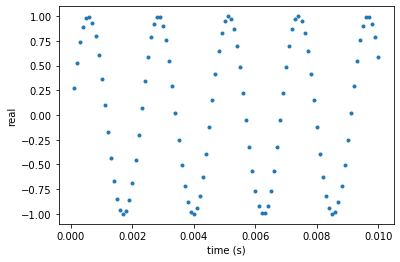

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:100], s[0:100], '.'); 
ax.set_xlabel('time (s)') #0.01초까지만 display되는 중
ax.set_ylabel('real')

In [7]:
ipd.Audio(s, rate=sr) #이러면 a음남. 왜냐면 440 이 a음 이라서. 880으로 해도 a음 그 두배도 a음 배수로 하면 옥타브를 떼는 것
#sin대신 cos하면 시작점이 1부터로 달라짐. 몇번 왔다갔다인지는 똑같음 a음 인것도 똑같음
#sin cos는 shape은 같음 cos에서 90도 (pi/2)만큼 오른쪽으로 이동하면 sin이 됨. 몇도를 이동하든(phase) 우리는 같은 소리로 인식. 
#우리는 frequency에 sensitivity를 가지지 phase에 대해서는 아무런 sensitivity도 안가짐

In [9]:
c= amp*np.exp(theta*1j)
c

array([0.96202767+2.72951936e-01j, 0.85099448+5.25174630e-01j,
       0.67533281+7.37513117e-01j, ..., 0.85099448-5.25174630e-01j,
       0.96202767-2.72951936e-01j, 1.        +3.13806691e-14j])

Text(0.5, 0, 'imag')

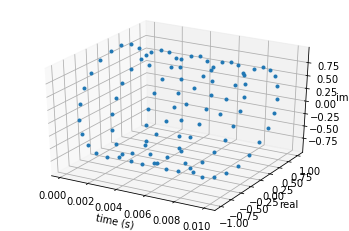

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:100], c.real[0:100], c.imag[0:100],'.'); 
ax.set_xlabel('time (s)') #0.01초까지만 display되는 중
ax.set_ylabel('real')
ax.set_zlabel('imag')

In [ ]:
def hz2w(F, sr):
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance (srate, F, BW):
    a2 = np.exp(-hz2w(BW,srate))
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b
#내용은 몰라도됨

In [ ]:
#resonance쓸 때 맨처음에는 sampling rate, 그 다음 frequency 값, weight(얼마나뚱뚱하냐 폭을 이야기하는 것)

In [ ]:
RG = 0  # RG is the frequency of the Glottal Resonator
BWG = 100  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 500  # RG is the frequency of the Glottal Resonator
BWG = 60  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 1500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 2500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 3500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
s = lfilter(np.array([1, -1]), np.array([1]), s)
ipd.Audio(s, rate=sr)#입술의 역할(더 큰 공명) #이게 우리의 목소리와 관련 있음